In [4]:
# Add analysis to the path
import sys
sys.path.append("/home/jazev/dev/analysis")

import matplotlib.pyplot as plt
import parsers
from typing import *
from aggregation import *

path_to_results = "/home/jazev/dev/automation/archive"
working_dir = "/home/jazev/dev/analysis/working"
data = parsers.main(path_to_results, working_dir=working_dir)
print("Finished")

Finished


In [5]:
def examine_single_replica_test(test_id, replica_block_size=10, sampling_period=5.0, peak=None):
    actual_replicas = len(data[test_id].replicas) // replica_block_size
    for i in range(actual_replicas):
        fig = plt.figure(figsize=(13, 5.8))
        for j in range(replica_block_size):
            r = i * replica_block_size + j
            variant_id = f"{test_id}-{r:02d}"
            df = aggregate_cpu(data[test_id].replicas[r].single(), sampling_period=sampling_period)
            plt.plot([t / 1E3 for t in normalize(df["time"])], df["cpu"], label=variant_id)
        plt.legend(loc="upper right")
        plt.title(f"CPU % for replicas {i * replica_block_size} through {(i + 1) * replica_block_size - 1} for test ({test_id})")
        plt.xlabel(f"Time (seconds)")
        if peak is not None:
            plt.axhline(y=peak, color='gray', linestyle='dashed')
        plt.ylabel(f"Average CPU Utilization over {sampling_period:.1f} seconds (%)")
        plt.show()


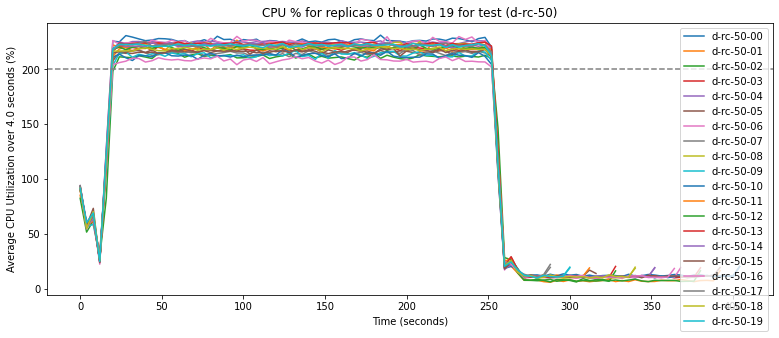

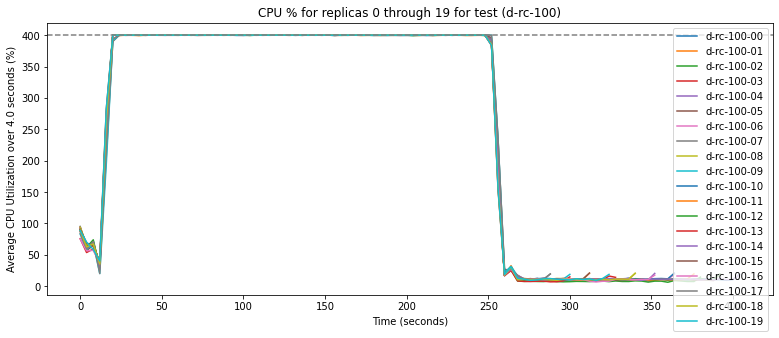

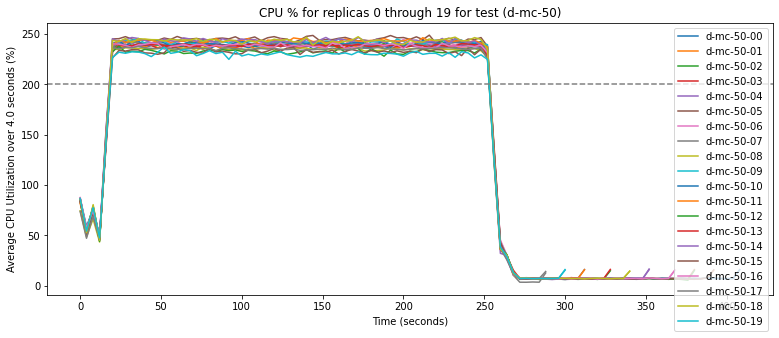

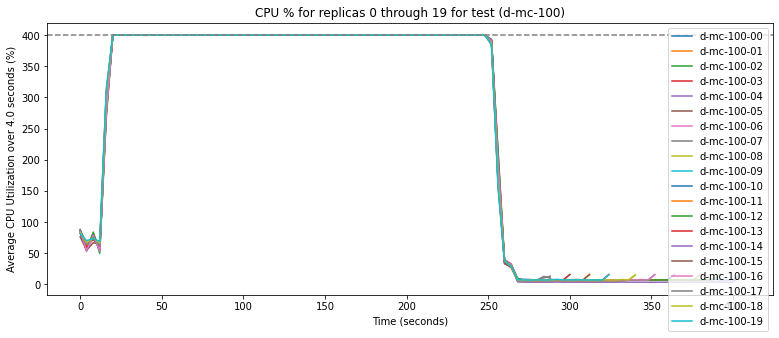

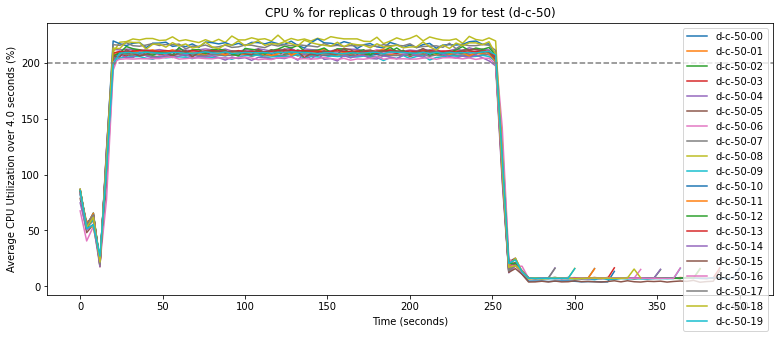

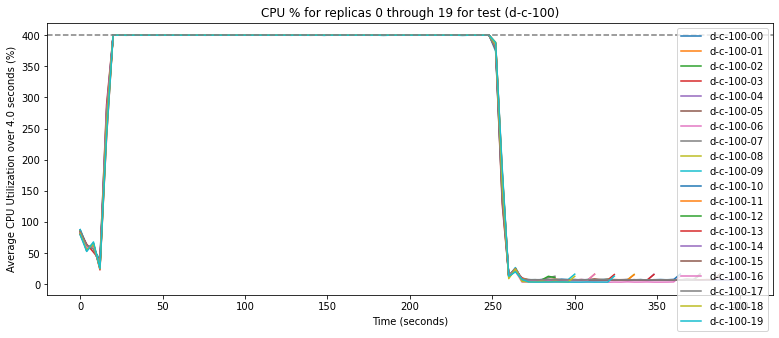

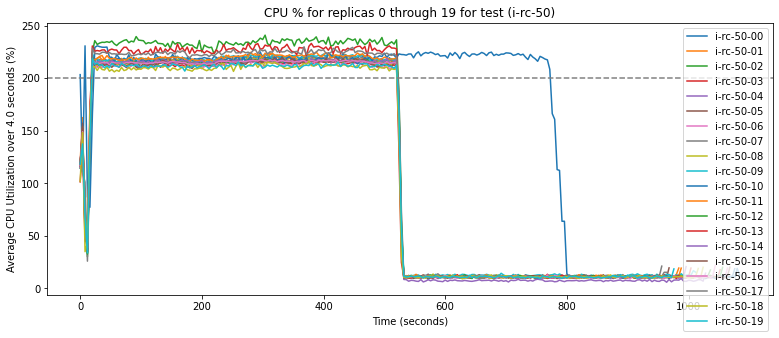

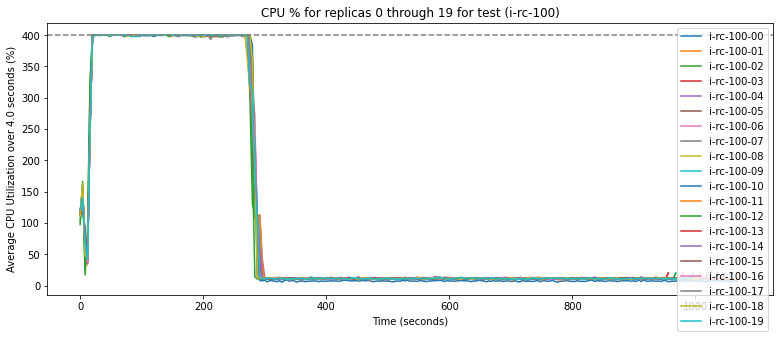

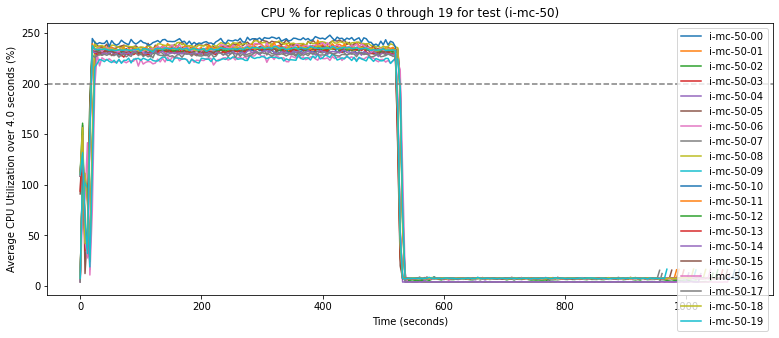

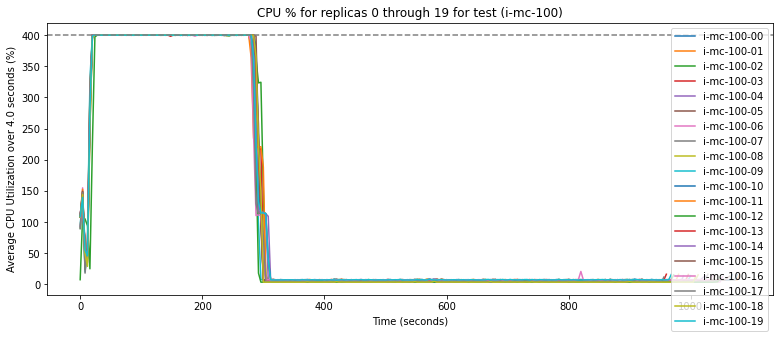

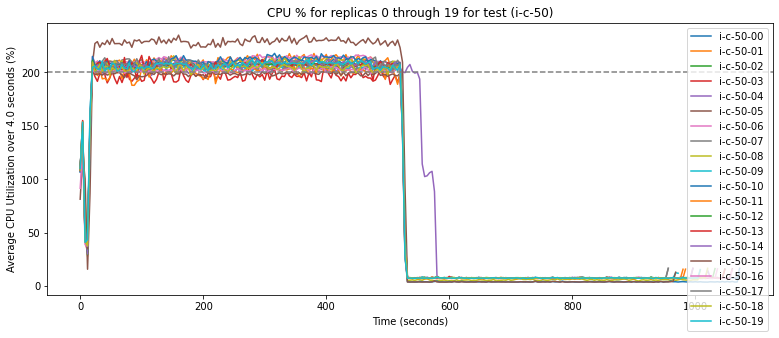

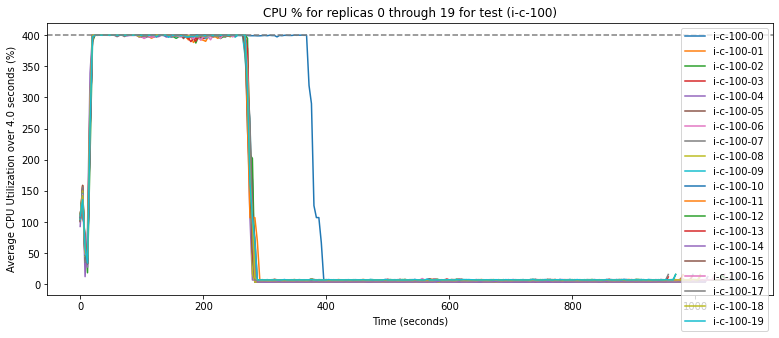

In [6]:
block_size = 20
examine_single_replica_test("d-rc-50", replica_block_size=block_size, sampling_period=4.0, peak=200)
examine_single_replica_test("d-rc-100", replica_block_size=block_size, sampling_period=4.0, peak=400)
examine_single_replica_test("d-mc-50", replica_block_size=block_size, sampling_period=4.0, peak=200)
examine_single_replica_test("d-mc-100", replica_block_size=block_size, sampling_period=4.0, peak=400)
examine_single_replica_test("d-c-50", replica_block_size=block_size, sampling_period=4.0, peak=200)
examine_single_replica_test("d-c-100", replica_block_size=block_size, sampling_period=4.0, peak=400)
examine_single_replica_test("i-rc-50", replica_block_size=block_size, sampling_period=4.0, peak=200)
examine_single_replica_test("i-rc-100", replica_block_size=block_size, sampling_period=4.0, peak=400)
examine_single_replica_test("i-mc-50", replica_block_size=block_size, sampling_period=4.0, peak=200)
examine_single_replica_test("i-mc-100", replica_block_size=block_size, sampling_period=4.0, peak=400)
examine_single_replica_test("i-c-50", replica_block_size=block_size, sampling_period=4.0, peak=200)
examine_single_replica_test("i-c-100", replica_block_size=block_size, sampling_period=4.0, peak=400)